In [2]:
from ConvergenceAnalysis import *


In [3]:
fd_beta_data
# rename System to Molecule
fd_beta_data.rename(columns={'System':'Molecule'}, inplace=True)
mols= fd_beta_data.Molecule.unique().tolist()
# remove KF 
mols.remove('KF')
mols.remove('LiBr')


In [4]:
fd_beta_data

,Molecule,R,dipole,alpha,beta
0,LiH,3.0150,-2.361805,21.874128,306.874000
1,BH,2.3289,-0.684961,22.559887,-10.458300
2,FH,1.7328,-0.756076,5.754232,-8.448100
3,CO,2.1320,0.104245,14.466680,31.408084
4,BF,2.3860,0.342808,16.645013,63.968600
5,NaCl,4.4613,NaN,28.700184,222.796700
6,LiBr,4.1015,NaN,34.050885,-148.976600
7,KF,4.1035,NaN,15.588210,-52.430000
8,HeNe,2.7500,NaN,22.560640,-10.459700


In [5]:
# query molecule LiH 
fd_beta_data.query('Molecule == "LiH"')

,Molecule,R,dipole,alpha,beta
0,LiH,3.015,-2.361805,21.874128,306.874


In [6]:
from DataAnalysisClass import *

october_absolute_kain_path = Path('/mnt/data/madness_data/october_beta_absolute_kain/')
paper_path = Path('/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/Figures_v2')



In [7]:

single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized + double + double_polarized


In [8]:
low_q_data=QuadraticDatabase(mols,all_basis_sets,'hf','dipole',[0],october_absolute_kain_path
                             .joinpath('low-low'),False)
high_q_data=QuadraticDatabase(mols,all_basis_sets,'hf','dipole',[0],october_absolute_kain_path
                             .joinpath('high-high'),False)
# save data

In [9]:
#low_q_data.save_dfs()
high_q_data.save_dfs()


In [10]:

# get the percent error relative to the FD datal
beta_data=low_q_data.q_df.copy()
beta_data=high_q_data.q_df.copy()

low_z_data=create_z_beta_data(low_q_data.q_df)
# add column called MRA-LOW
low_z_data['Protocol']='Medium'
high_z_data=create_z_beta_data(high_q_data.q_df)
# add column called MRA-HIGH
high_z_data['Protocol']='High'
# concatenate the two dataframes
z_data=pd.concat([low_z_data,high_z_data],axis=0)


z_data


,Afreq,Bfreq,Cfreq,ijk,basis,molecule,Beta,FD,Percent Error,Absolute Percent Error,MRA,Protocol
26,0.000000,0.000000,0.000000,ZZZ,MRA,LiH,306.40200,306.874000,-0.153809,0.153809,MRA,Medium
53,0.000000,0.000000,0.000000,ZZZ,MRA,BH,-10.36220,-10.458300,-0.918887,0.918887,MRA,Medium
80,0.000000,0.000000,0.000000,ZZZ,MRA,FH,-8.43499,-8.448100,-0.155183,0.155183,MRA,Medium
107,0.000000,0.000000,0.000000,ZZZ,MRA,CO,31.39650,31.408084,-0.036882,0.036882,MRA,Medium
134,0.000000,0.000000,0.000000,ZZZ,MRA,BF,63.95930,63.968600,-0.014538,0.014538,MRA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
14112,0.054563,0.021825,0.032738,ZZZ,d-aug-cc-pCVQZ,NaCl,247.37600,222.796700,11.032165,11.032165,Other,High
14113,0.043650,0.000000,0.043650,ZZZ,d-aug-cc-pCVQZ,NaCl,243.49500,222.796700,9.290218,9.290218,Other,High
14114,0.054563,0.010913,0.043650,ZZZ,d-aug-cc-pCVQZ,NaCl,250.01100,222.796700,12.214858,12.214858,Other,High
14115,0.065475,0.021825,0.043650,ZZZ,d-aug-cc-pCVQZ,NaCl,259.59100,222.796700,16.514742,16.514742,Other,High


['D', 'T', 'Q', '5']


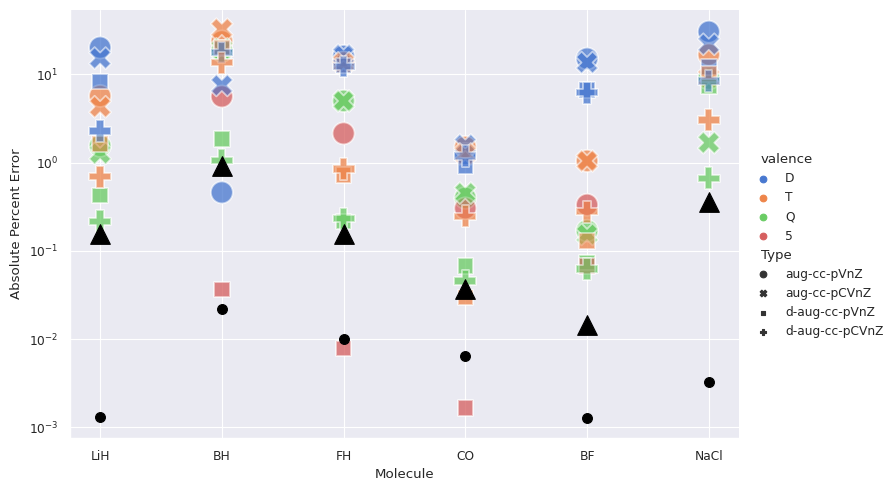

In [11]:

beta_z_plot=compare_z_beta_to_basis_set(z_data,'Absolute Percent Error')
# save the plot
beta_z_plot.savefig(paper_path.joinpath('beta_z_plot_2.png'),dpi=600)


In [12]:
z_data.query('basis=="MRA"').sort_values('molecule')

,Afreq,Bfreq,Cfreq,ijk,basis,molecule,Beta,FD,Percent Error,Absolute Percent Error,MRA,Protocol
134,0.0,0.0,0.0,ZZZ,MRA,BF,63.95930,63.968600,-0.014538,0.014538,MRA,Medium
134,0.0,0.0,0.0,ZZZ,MRA,BF,63.96780,63.968600,-0.001251,0.001251,MRA,High
53,0.0,0.0,0.0,ZZZ,MRA,BH,-10.36220,-10.458300,-0.918887,0.918887,MRA,Medium
53,0.0,0.0,0.0,ZZZ,MRA,BH,-10.46060,-10.458300,0.021992,0.021992,MRA,High
107,0.0,0.0,0.0,ZZZ,MRA,CO,31.39650,31.408084,-0.036882,0.036882,MRA,Medium
107,0.0,0.0,0.0,ZZZ,MRA,CO,31.41010,31.408084,0.006419,0.006419,MRA,High
80,0.0,0.0,0.0,ZZZ,MRA,FH,-8.43499,-8.448100,-0.155183,0.155183,MRA,Medium
80,0.0,0.0,0.0,ZZZ,MRA,FH,-8.44726,-8.448100,-0.009943,0.009943,MRA,High
26,0.0,0.0,0.0,ZZZ,MRA,LiH,306.40200,306.874000,-0.153809,0.153809,MRA,Medium
26,0.0,0.0,0.0,ZZZ,MRA,LiH,306.87800,306.874000,0.001303,0.001303,MRA,High


In [13]:



low_data = PolarizabilityData(mols, 'hf', 'dipole', all_basis_sets,
                              october_absolute_kain_path.joinpath
                              ('low-low'),overwrite=False)
high_data = PolarizabilityData(mols, 'hf', 'dipole', all_basis_sets, october_absolute_kain_path
                               .joinpath('high-high'),overwrite=True)

low_data.save_dfs()
high_data.save_dfs()
low_data.polar_data.query('omega==0')
low_data.iso_data.query('omega==0')


Length mismatch: Expected axis has 21 elements, new values have 210 elements
Could not initialize eigen_diff
LiH /mnt/data/madness_data/october_beta_absolute_kain/high-high/hf/LiH/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_beta_absolute_kain/high-high/hf/LiH/beta.json
    Afreq  Bfreq  Cfreq  A  B  C          Beta molecule basis
0     0.0    0.0    0.0  X  X  X -1.874637e-05      LiH   MRA
1     0.0    0.0    0.0  X  X  Y -6.239341e-06      LiH   MRA
2     0.0    0.0    0.0  X  X  Z  1.873509e+02      LiH   MRA
3     0.0    0.0    0.0  X  Y  Y -6.148154e-06      LiH   MRA
4     0.0    0.0    0.0  X  Y  Z  4.310019e-12      LiH   MRA
5     0.0    0.0    0.0  X  Z  Z -4.315940e-05      LiH   MRA
6     0.0    0.0    0.0  Y  X  X -6.090272e-06      LiH   MRA
7     0.0    0.0    0.0  Y  X  Y -6.299118e-06      LiH   MRA
8     0.0    0.0    0.0  Y  X  Z  4.444872e-12      LiH   MRA
9     0.0    0.0    0.0  Y  Y  Y -1.856893e-05      LiH   MRA
10    0.0    0.0    0.0

,molecule,basis,omega,alpha,gamma
0,LiH,MRA,0,24.143613,3.404225
10,LiH,aug-cc-pVDZ,0,23.901375,4.651790
20,LiH,aug-cc-pVTZ,0,24.160270,3.426007
30,LiH,aug-cc-pVQZ,0,24.145022,3.402734
40,LiH,d-aug-cc-pVDZ,0,24.378137,3.990831
...,...,...,...,...,...
1000,HeNe,aug-cc-pCVTZ,0,NaN,NaN
1010,HeNe,aug-cc-pCVQZ,0,NaN,NaN
1020,HeNe,d-aug-cc-pV5Z,0,NaN,NaN
1030,HeNe,d-aug-cc-pCVDZ,0,NaN,NaN


In [14]:
low_z_data=create_z_data(low_data,'two')
# create Protocol column
low_z_data['Protocol']='Medium'
high_z_data=create_z_data(high_data,'two')
high_z_data['Protocol']='High'
z_data=pd.concat([low_z_data,high_z_data])
z_data
# remove HeNe
z_data=z_data.query('molecule!="HeNe"')



['D', 'T', 'Q', '5']


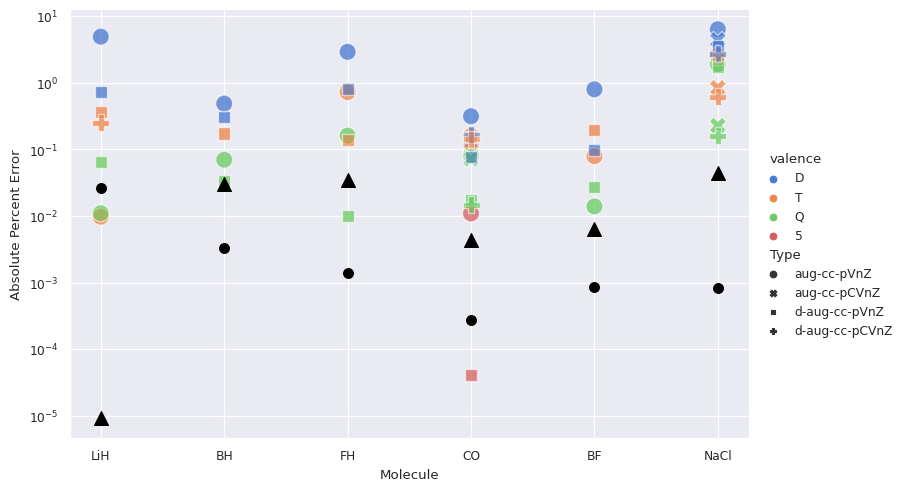

In [15]:
z_abs_error_plot=compare_z_to_basis_set(z_data,y='Absolute Percent Error')
z_abs_error_plot.savefig(paper_path.joinpath('z_abs_error_plot_2.png'),dpi=600)


In [16]:
low_data.iso_data.query('omega==0')
# grab the basis set data only 
basis_data=low_data.iso_data.query('omega==0 and basis!="MRA"').copy()
# add a column for the MRA data for each molecule by mapping based on molecule
basis_data['alpha(MRA)']=basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                      'basis=="MRA"').set_index
                                                    ('molecule')['alpha'].to_dict())
basis_data['gamma(MRA)']=basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                      'basis=="MRA"').set_index
                                                    ('molecule')['gamma'].to_dict())
#basis_data
# compute the percent error in alpha and gamma
basis_data['alpha error']=100*(basis_data['alpha']-basis_data['alpha(MRA)'])/basis_data['alpha(MRA)']
basis_data['gamma error']=100*(basis_data['gamma']-basis_data['gamma(MRA)'])/basis_data['gamma(MRA)']


In [17]:
basis_data=make_detailed_df(basis_data)
basis_data


['D', 'T', 'Q', '5']


,molecule,basis,omega,alpha,gamma,alpha(MRA),gamma(MRA),alpha error,gamma error,augmentation,polarization,mol_system,valence,Type
10,LiH,aug-cc-pVDZ,0,23.901375,4.651790,24.143613,3.404225,-1.003323,36.647559,aug,V,First-row,D,aug-cc-pVnZ
20,LiH,aug-cc-pVTZ,0,24.160270,3.426007,24.143613,3.404225,0.068990,0.639865,aug,V,First-row,T,aug-cc-pVnZ
30,LiH,aug-cc-pVQZ,0,24.145022,3.402734,24.143613,3.404225,0.005836,-0.043811,aug,V,First-row,Q,aug-cc-pVnZ
40,LiH,d-aug-cc-pVDZ,0,24.378137,3.990831,24.143613,3.404225,0.971370,17.231712,d-aug,V,First-row,D,d-aug-cc-pVnZ
50,LiH,d-aug-cc-pVTZ,0,24.208182,3.381911,24.143613,3.404225,0.267435,-0.655473,d-aug,V,First-row,T,d-aug-cc-pVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,HeNe,aug-cc-pCVTZ,0,NaN,NaN,3.519983,0.248032,NaN,NaN,aug,CV,First-row,T,aug-cc-pCVnZ
1010,HeNe,aug-cc-pCVQZ,0,NaN,NaN,3.519983,0.248032,NaN,NaN,aug,CV,First-row,Q,aug-cc-pCVnZ
1020,HeNe,d-aug-cc-pV5Z,0,NaN,NaN,3.519983,0.248032,NaN,NaN,d-aug,V,First-row,5,d-aug-cc-pVnZ
1030,HeNe,d-aug-cc-pCVDZ,0,NaN,NaN,3.519983,0.248032,NaN,NaN,d-aug,CV,First-row,D,d-aug-cc-pCVnZ


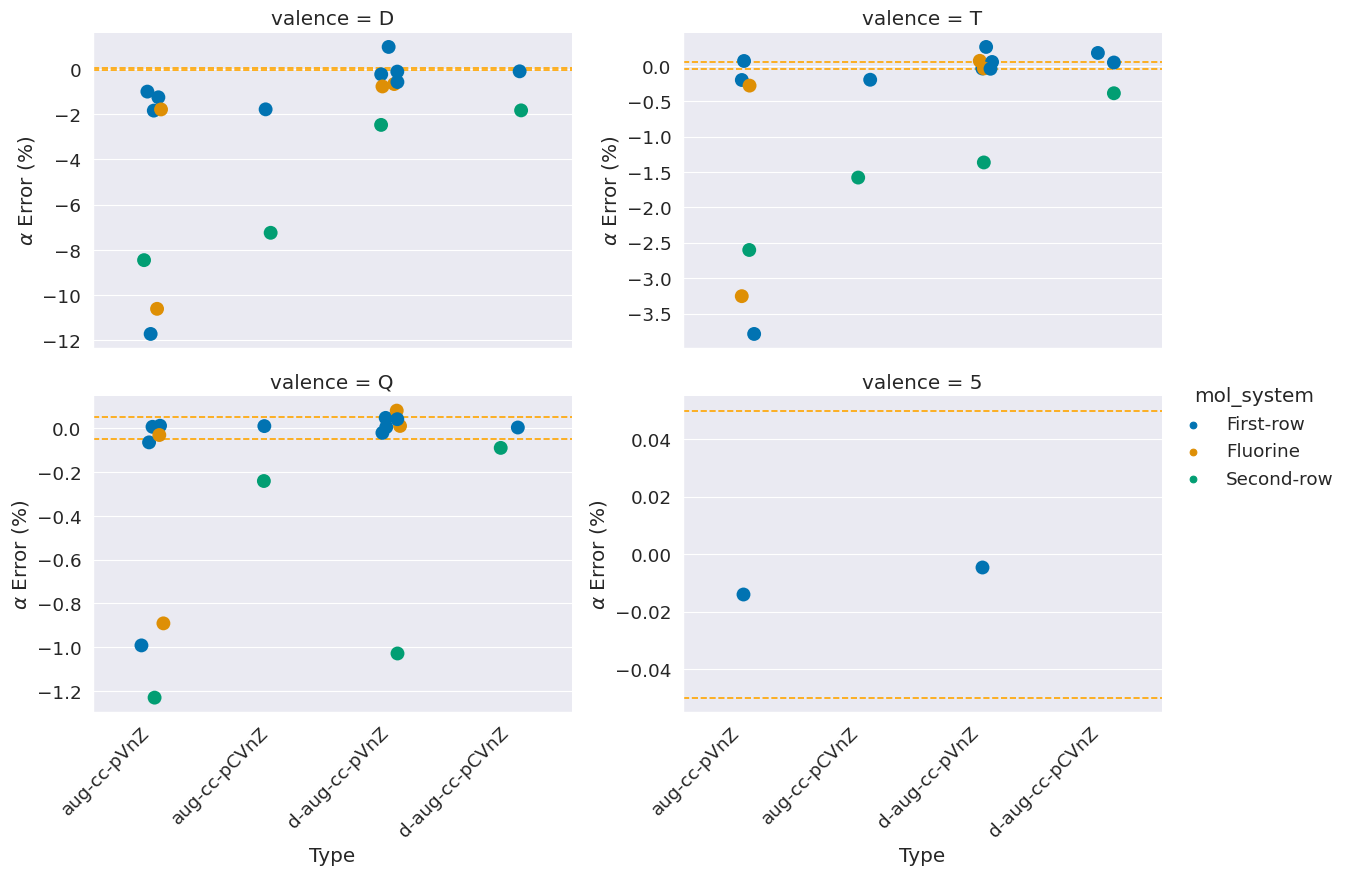

In [18]:
with sns.plotting_context('paper',font_scale=1.5):
    g=sns.catplot(col='valence',x='Type',y='alpha error',hue='mol_system',
                  data=basis_data,kind='strip',dodge=False,jitter=True,col_wrap=2,
                  s=100,palette='colorblind',height=4,aspect=1.5,sharey=False)
    
    for ax in g.axes.flat:
        #ax.set_yscale('symlog', linthresh=1e-2)
        # draw horizontal line at .05%
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')
         
        ax.set_ylabel(r'$\alpha$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')
        
        
            
        


In [19]:
low_data.iso_data.query('omega==0')
# grab the basis set data only 
basis_data=low_data.iso_data.query('omega==0 and basis!="MRA"').copy()
# add a column for the MRA data for each molecule by mapping based on molecule
basis_data['alpha(MRA)']=basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                            'basis=="MRA"').set_index
                                                    ('molecule')['alpha'].to_dict())
basis_data['gamma(MRA)']=basis_data['molecule'].map(low_data.iso_data.query('omega==0 and '
                                                                            'basis=="MRA"').set_index
                                                    ('molecule')['gamma'].to_dict())
#basis_data
# compute the percent error in alpha and gamma
basis_data['alpha error']=100*(basis_data['alpha']-basis_data['alpha(MRA)'])/basis_data['alpha(MRA)']
basis_data['gamma error']=100*(basis_data['gamma']-basis_data['gamma(MRA)'])/basis_data['gamma(MRA)']



In [20]:
basis_data=high_q_data.beta_hrs_df.query('basis!="MRA" & Afreq==0.0').copy()
basis_data['beta(MRA)']=basis_data['molecule'].map(low_q_data.beta_hrs_df.query('basis=="MRA" & '
                                                                                'Afreq==0.0')
                                                   .set_index('molecule')['Beta'].to_dict())
basis_data['beta error']=100*(basis_data['Beta']-basis_data['beta(MRA)'])/basis_data['beta(MRA)']
basis_data=make_detailed_df(basis_data)
basis_data

['D', 'T', 'Q', '5']


,molecule,basis,Afreq,Bfreq,Cfreq,dipolar,octupolar,Beta,beta(MRA),beta error,augmentation,polarization,mol_system,valence,Type
0,LiH,aug-cc-pVDZ,0.0,0.0,0.0,424093.133117,45931.253108,314.033953,253.594948,23.832890,aug,V,First-row,D,aug-cc-pVnZ
1,LiH,aug-cc-pVTZ,0.0,0.0,0.0,306354.166282,27217.402022,265.839871,253.594948,4.828536,aug,V,First-row,T,aug-cc-pVnZ
2,LiH,aug-cc-pVQZ,0.0,0.0,0.0,286014.493910,26333.729090,257.034532,253.594948,1.356330,aug,V,First-row,Q,aug-cc-pVnZ
3,LiH,aug-cc-pCVDZ,0.0,0.0,0.0,397107.422713,44988.141582,304.188558,253.594948,19.950559,aug,CV,First-row,D,aug-cc-pCVnZ
4,LiH,aug-cc-pCVTZ,0.0,0.0,0.0,301547.345510,27699.590042,263.910169,253.594948,4.067597,aug,CV,First-row,T,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,HeNe,aug-cc-pVTZ,0.0,0.0,0.0,2.508604,0.615460,0.784909,0.568322,38.110076,aug,V,First-row,T,aug-cc-pVnZ
94,HeNe,aug-cc-pVQZ,0.0,0.0,0.0,2.299227,0.361254,0.738474,0.568322,29.939522,aug,V,First-row,Q,aug-cc-pVnZ
95,HeNe,d-aug-cc-pVDZ,0.0,0.0,0.0,1.046337,0.132227,0.495088,0.568322,-12.885905,d-aug,V,First-row,D,d-aug-cc-pVnZ
96,HeNe,d-aug-cc-pVTZ,0.0,0.0,0.0,1.713907,0.166664,0.629874,0.568322,10.830528,d-aug,V,First-row,T,d-aug-cc-pVnZ


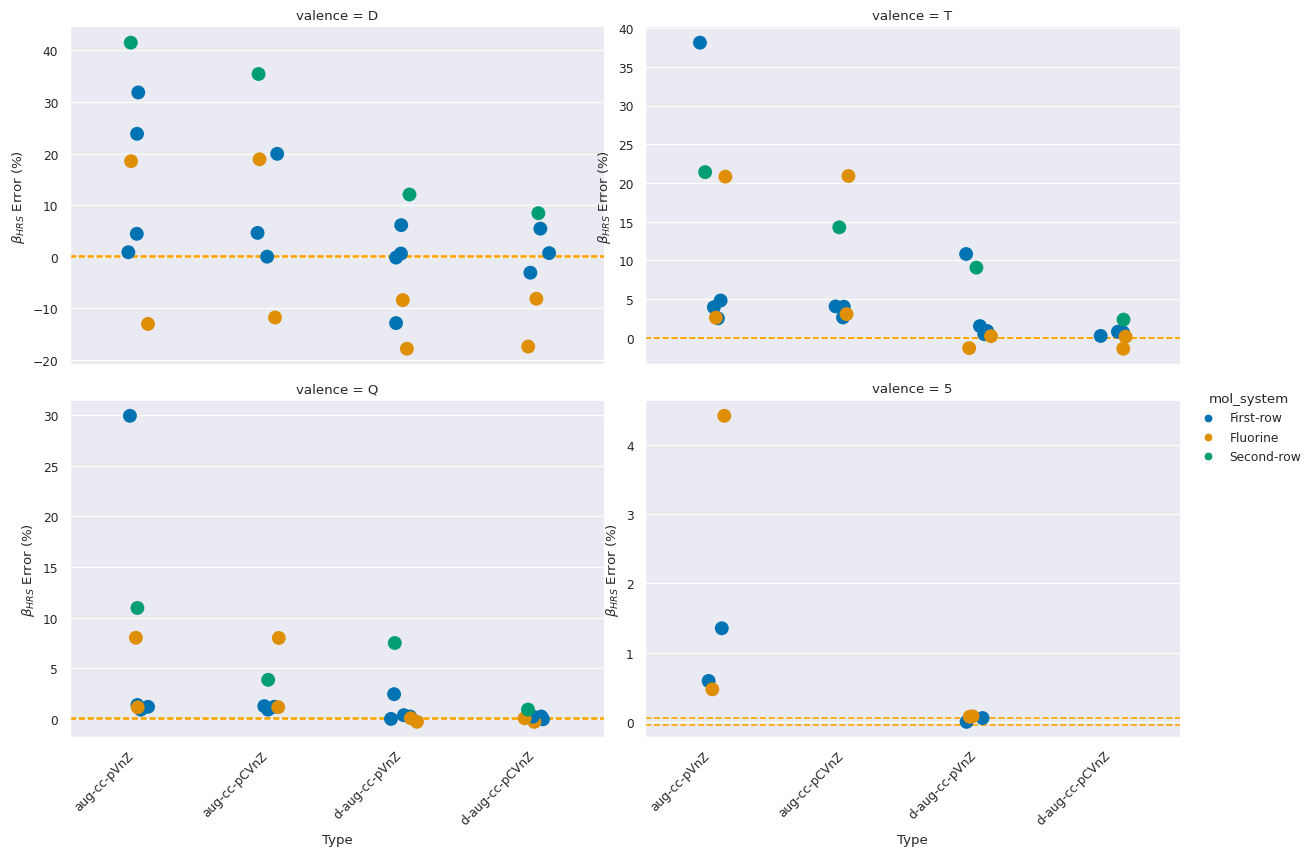

In [21]:
with sns.plotting_context('paper',font_scale=1.0):
    g=sns.catplot(col='valence',x='Type',y='beta error',hue='mol_system',
                  data=basis_data,kind='strip',dodge=False,jitter=True,col_wrap=2,
                  s=100,palette='colorblind',height=4,aspect=1.5,sharey=False)

    for ax in g.axes.flat:
        #ax.set_yscale('symlog', linthresh=1e-2)
        # draw horizontal line at .05%
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')

        ax.set_ylabel(r'$\beta_{HRS}$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')


In [22]:

basis_data=high_q_data.q_df.query('basis!="MRA" & Afreq==0.0 & ijk=="ZZZ"').copy()
basis_data['beta(MRA)']=basis_data['molecule'].map(low_q_data.q_df.query('basis=="MRA" & '
                                                                                'Afreq==0.0 & ijk=="ZZZ"')
                                                   .set_index('molecule')['Beta'].to_dict())
basis_data['beta error']=100*(basis_data['Beta']-basis_data['beta(MRA)'])/basis_data['beta(MRA)']
basis_data=make_detailed_df(basis_data)
basis_data


['D', 'T', 'Q', '5']


,Afreq,Bfreq,Cfreq,ijk,basis,molecule,Beta,beta(MRA),beta error,augmentation,polarization,mol_system,valence,Type
189,0.0,0.0,0.0,ZZZ,aug-cc-pVDZ,LiH,368.89100,306.40200,20.394449,aug,V,First-row,D,aug-cc-pVnZ
364,0.0,0.0,0.0,ZZZ,aug-cc-pVTZ,LiH,324.39300,306.40200,5.871698,aug,V,First-row,T,aug-cc-pVnZ
539,0.0,0.0,0.0,ZZZ,aug-cc-pVQZ,LiH,311.62400,306.40200,1.704297,aug,V,First-row,Q,aug-cc-pVnZ
714,0.0,0.0,0.0,ZZZ,aug-cc-pCVDZ,LiH,353.97700,306.40200,15.526987,aug,CV,First-row,D,aug-cc-pCVnZ
889,0.0,0.0,0.0,ZZZ,aug-cc-pCVTZ,LiH,320.09600,306.40200,4.469292,aug,CV,First-row,T,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15414,0.0,0.0,0.0,ZZZ,aug-cc-pVTZ,HeNe,1.72302,1.18851,44.973118,aug,V,First-row,T,aug-cc-pVnZ
15589,0.0,0.0,0.0,ZZZ,aug-cc-pVQZ,HeNe,1.55467,1.18851,30.808323,aug,V,First-row,Q,aug-cc-pVnZ
15764,0.0,0.0,0.0,ZZZ,d-aug-cc-pVDZ,HeNe,1.02232,1.18851,-13.983054,d-aug,V,First-row,D,d-aug-cc-pVnZ
15939,0.0,0.0,0.0,ZZZ,d-aug-cc-pVTZ,HeNe,1.27227,1.18851,7.047480,d-aug,V,First-row,T,d-aug-cc-pVnZ


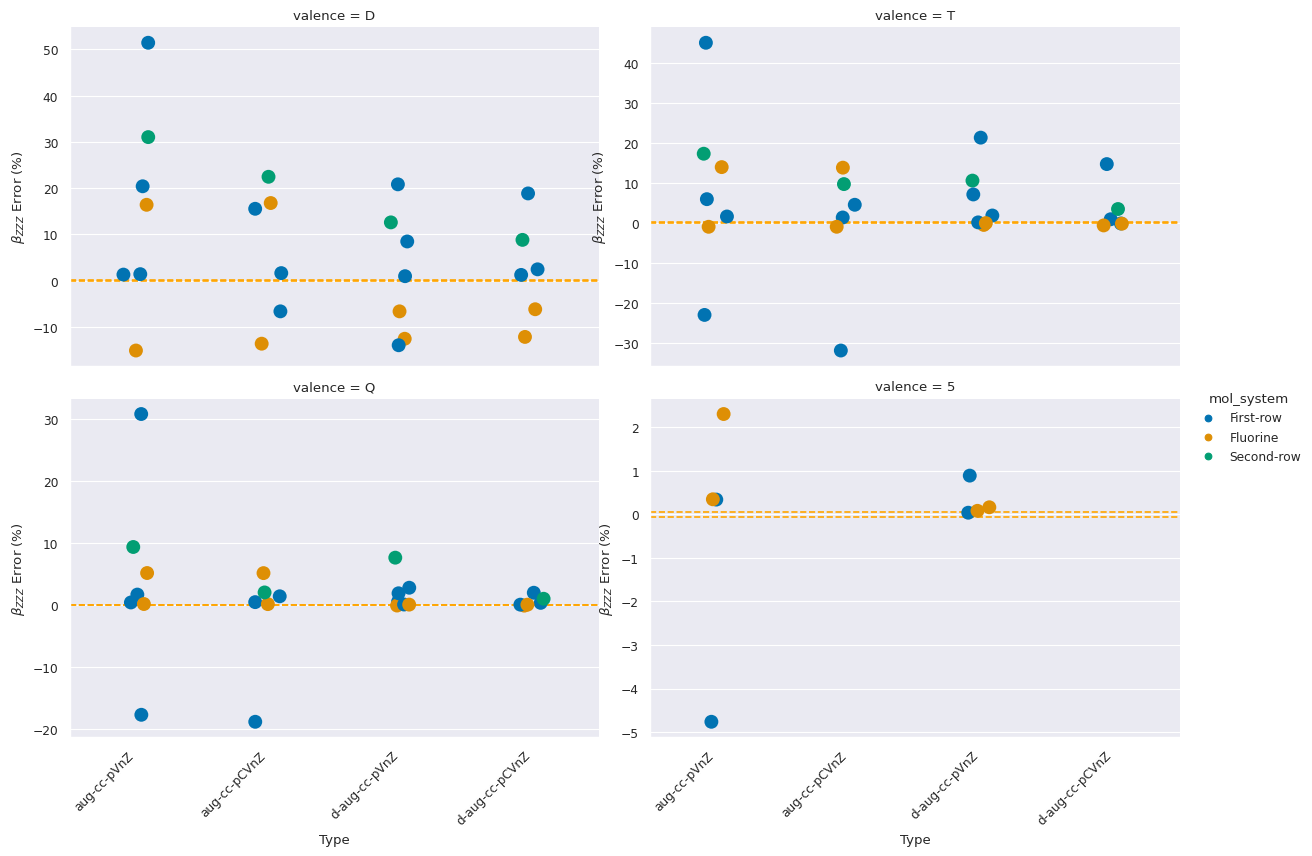

In [23]:

with sns.plotting_context('paper',font_scale=1.0):
    g=sns.catplot(col='valence',x='Type',y='beta error',hue='mol_system',
                  data=basis_data,kind='strip',dodge=False,jitter=True,col_wrap=2,
                  s=100,palette='colorblind',height=4,aspect=1.5,sharey=False)

    for ax in g.axes.flat:
        #ax.set_yscale('symlog', linthresh=1e-2)
        # draw horizontal line at .05%
        ax.axhline(y=.05,linestyle='--',color='orange')
        ax.axhline(y=-.05,linestyle='--',color='orange')

        ax.set_ylabel(r'$\beta_{ZZZ}$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')

